![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (50+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

## Table of Contents

1. [Installation](#installation)
2. [The Toolkit Module](#the-toolkit-module)
3. [The Ratios Module](#the-ratios-module)
4. [The Models Module](#the-models-module)
5. [Calling Functions Directly](#calling-functions-directly)

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
The dependencies of the package are on purpose *very slim* so that it will work well with any combination of packages and not result in conflicts. I've also been careful with my selection in which I leave out functionality like technical analysis in which [ta-lib](https://ta-lib.org/) does an excellent job as well as portfolio attribution and optimisation in which [Riskfolio-lib](https://riskfolio-lib.readthedocs.io/en/latest/index.html) shines and lastly allow for any source to be incorporated to allow for the incorporation of data sources from [OpenBB](https://openbb.co/).

In [1]:
import pandas as pd
import numpy as np

from financetoolkit import Toolkit

API_KEY = "FMP_KEY"

# The Toolkit Module

Initializing only is required once. This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY, start_date='2000-01-01')

Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2023-07-10  188.610001  127.129997  116.449997  331.829987  188.610001   
2023-07-11  188.080002  128.779999  117.139999  332.470001  188.080002   
2023-07-12  189.770004  130.800003  118.930000  337.200012  189.770004   
2023-07-13  190.539993  134.300003  124.540001  342.660004  190.539993   
2023-07-14  190.690002  134.679993  125.419998  345.239990  190.690002   
2023-07-17  193.990005  133.559998  124.650002  345.730011  193.990005   
2023-07-18  193.729996  132.830002  123.760002  359.489990  193.729996   
2023-07-19  195.100006  135.360001  122.029999  355.079987  195.100006   
2023-07-20  193.130005  129.960007  119.199997  346.869995  193.130005   
2023-07-21  191.940002  130.000000  120.019997  343.769989  191.940002   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2023-07-10  127.129997  116.449997  331.829987  189.990005  129.279999  ...   
2023-07-11  128.779999  117.139999  332.470001  189.300003  129.770004  ...   
2023-07-12  130.800003  118.930000  337.200012  191.699997  131.259995  ...   
2023-07-13  134.300003  124.540001  342.660004  191.190002  134.669998  ...   
2023-07-14  134.679993  125.419998  345.239990  191.179993  136.649994  ...   
2023-07-17  133.559998  124.650002  345.730011  194.320007  135.619995  ...   
2023-07-18  132.830002  123.760002  359.489990  194.330002  133.860001  ...   
2023-07-19  135.360001  122.029999  355.079987  198.229996  135.990005  ...   
2023-07-20  129.960007  119.199997  346.869995  196.470001  134.789993  ...   
2023-07-21  130.000000  120.019997  343.769989  194.970001  131.369995  ...   

                   Low                    Open                          \
                 GOOGL        MSFT        AAPL        AMZN       GOOGL   
Date                                                                     
2023-07-10  116.139999  327.589996  189.259995  129.070007  118.300003   
2023-07-11  115.349998  327.000000  189.160004  127.750000  116.290001   
2023-07-12  118.410004  335.670013  189.679993  130.309998  118.800003   
2023-07-13  120.449997  339.019989  190.500000  134.039993  120.930000   
2023-07-14  123.489998  344.309998  190.229996  134.059998  124.800003   
2023-07-17  124.199997  342.200012  191.899994  134.559998  125.940002   
2023-07-18  122.959999  342.170013  193.350006  132.710007  124.599998   
2023-07-19  121.800003  352.440002  193.100006  133.389999  124.599998   
2023-07-20  118.220001  345.369995  195.089996  134.070007  121.419998   
2023-07-21  118.730003  339.829987  194.100006  131.339996  120.620003   

                          Volume                                   
                  MSFT      AAPL       AMZN       GOOGL      MSFT  
Date                                                               
2023-07-10  334.600006  59922200   61889300  35315200.0  32791400  
2023-07-11  331.059998  46638100   49951500  23078800.0  26698200  
2023-07-12  336.600006  60750200   54022800  30404400.0  29995300  
2023-07-13  339.559998  41342300   61170900  44297900.0  20567200  
2023-07-14  347.589996  41573900   54388100  33266800.0  28302200  
2023-07-17  345.679993  50520200   48450200  25716200.0  20363900  
2023-07-18  345.829987  48353800   54969100  26226400.0  64872700  
2023-07-19  361.750000  80507300   54531000  37224000.0  39732900  
2023-07-20  353.570007  59581200   59820600  37906800.0  33778400  
2023-07-21  349.149994  71917800  133265000  72937900.0  69368900  

[10 rows x 24 columns]

Adj Close                                           Close              \
            AAPL        AMZN       GOOGL        MSFT        AAPL        AMZN   
Date                                                                           
1999    0.780221    3.806250         NaN   36.340614    0.917969    3.806250   
2000    0.225766    0.778125         NaN   13.501278    0.265625    0.778125   
2001    0.332388    0.541000         NaN   20.621553    0.391071    0.541000   
2002    0.217494    0.944500         NaN   16.092590    0.255893    0.944500   
2003    0.324344    2.631000         NaN   17.189533    0.381607    2.631000   
2004    0.977434    2.214500    4.824575   18.758621    1.150000    2.214500   
2005    2.182228    2.357500   10.381882   18.582619    2.567500    2.357500   
2006    2.575326    1.973000   11.523524   21.525976    3.030000    1.973000   
2007    6.012737    4.632000   17.304304   26.012625    7.074286    4.632000   
2008    2.590807    2.564000    7.698949   14.466760    3.048214    2.564000   
2009    6.396731    6.726000   15.515015   23.214409    7.526071    6.726000   
2010    9.791342    9.000000   14.864114   21.699747   11.520000    9.000000   
2011   12.293813    8.655000   16.163664   20.719864   14.464286    8.655000   
2012   16.297525   12.543500   17.702202   21.921373   19.006071   12.543500   
2013   17.612654   19.939501   28.045795   31.632099   20.036428   19.939501   
2014   24.767363   15.517500   26.533001   40.351376   27.594999   15.517500   
2015   24.020947   33.794498   38.900501   49.507851   26.315001   33.794498   
2016   27.018866   37.493500   39.622501   56.972507   28.955000   37.493500   
2017   40.113373   58.473499   52.669998   80.177757   42.307499   58.473499   
2018   37.951183   75.098503   52.248001   96.850960   39.435001   75.098503   
2019   71.711731   92.391998   66.969498  152.596497   73.412498   92.391998   
2020  130.735291  162.846497   87.632004  217.502060  132.690002  162.846497   
2021  176.032745  166.716995  144.852005  331.640442  177.570007  166.716995   
2022  129.552719   84.000000   88.230003  238.699020  129.929993   84.000000   
2023  191.940002  130.000000  120.019997  343.769989  191.940002  130.000000   

                                    High              ...         Low  \
           GOOGL        MSFT        AAPL        AMZN  ...       GOOGL   
Date                                                  ...               
1999         NaN   58.375000    0.918527    3.968750  ...         NaN   
2000         NaN   21.687500    0.267857    0.856250  ...         NaN   
2001         NaN   33.125000    0.404643    0.559500  ...         NaN   
2002         NaN   25.850000    0.256429    0.978000  ...         NaN   
2003         NaN   27.370001    0.384464    2.674000  ...         NaN   
2004    4.824575   26.719999    1.160714    2.274500  ...    4.818819   
2005   10.381882   26.150000    2.586786    2.410000  ...   10.353854   
2006   11.523524   29.860001    3.050000    2.012500  ...   11.508008   
2007   17.304304   35.599998    7.160714    4.718500  ...   17.281782   
2008    7.698949   19.440001    3.133571    2.584500  ...    7.572823   
2009   15.515015   30.480000    7.619643    6.864000  ...   15.515015   
2010   14.864114   27.910000   11.552857    9.115000  ...   14.815566   
2011   16.163664   25.959999   14.510000    8.758500  ...   16.066566   
2012   17.702202   26.709999   19.121429   12.620500  ...   17.417418   
2013   28.045795   37.410000   20.045713   19.941500  ...   27.684183   
2014   26.533001   46.450001   28.282499   15.649000  ...   26.510000   
2015   38.900501   55.480000   26.757500   34.387501  ...   38.866001   
2016   39.622501   62.139999   29.299999   38.369999  ...   39.480999   
2017   52.669998   85.540001   42.647499   59.200001  ...   52.634998   
2018   52.248001  101.570000   39.840000   76.038002  ...   51.652000   
2019   66.969498  157.699997   73.419998   92.663002  ...   66.606499   
2020   87.6320

<Axes: xlabel='Date'>

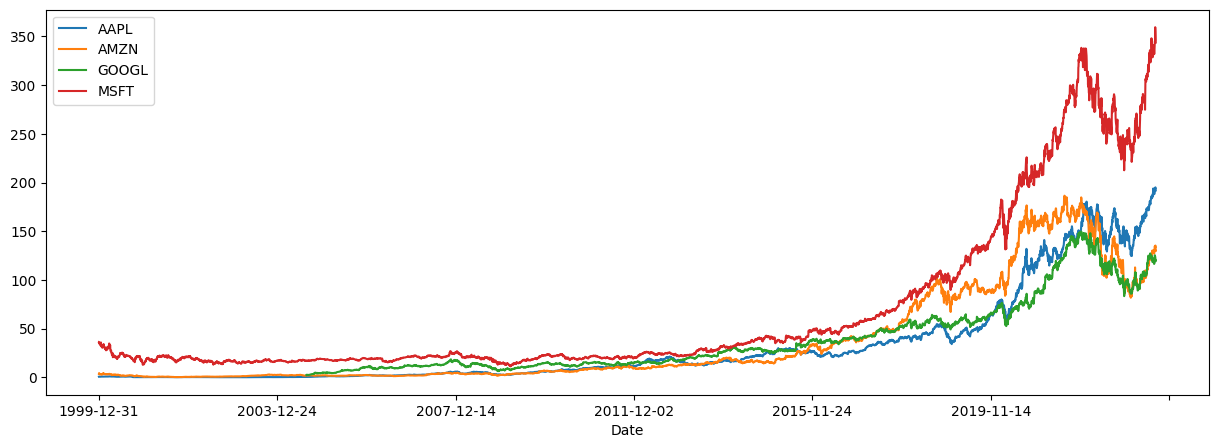

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data().tail(10))

# Obtain yearly historical data from each company
display(companies.get_historical_data(period="yearly"))

# Plot the Adjusted Close Prices
companies.get_historical_data()["Adj Close"].plot(figsize=(15, 5))

In [4]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

date                                          2001          2002  \
AAPL Cash and Cash Equivalents        2.310000e+09  2.252000e+09   
     Short Term Investments           2.026000e+09  2.085000e+09   
     Cash and Short Term Investments  4.336000e+09  4.337000e+09   
     Accounts Receivable              4.660000e+08  5.650000e+08   
     Inventory                        1.100000e+07  4.500000e+07   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     5.925700e+10  6.764600e+10   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -3.922000e+09 -3.016000e+09   

date                                          2003          2004  \
AAPL Cash and Cash Equivalents        3.396000e+09  2.969000e+09   
     Short Term Investments           1.170000e+09  2.495000e+09   
     Cash and Short Term Investments  4.566000e+09  5.464000e+09   
     Accounts Receivable              9.500000e+08  1.050000e+09   
     Inventory                        5.600000e+07  1.010000e+08   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     7.957100e+10  9.238900e+10   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -6.438000e+09 -1.598200e+10   

date                                          2005          2006  \
AAPL Cash and Cash Equivalents        3.491000e+09  6.392000e+09   
     Short Term Investments           4.770000e+09  3.718000e+09   
     Cash and Short Term Investments  8.261000e+09  1.011000e+10   
     Accounts Receivable              1.312000e+09  2.845000e+09   
     Inventory                        1.650000e+08  2.700000e+08   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     7.081500e+10  6.959700e+10   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -4.851000e+09 -6.714000e+09   

date                                          2007          2008  \
AAPL Cash and Cash Equivalents        9.352000e+09  1.187500e+10   
     Short Term Investments           6.034000e+09  1.261500e+10   
     Cash and Short Term Investments  1.538600e+10  2.449000e+10   
     Accounts Receivable              4.029000e+09  2.422000e+09   
     Inventory                        3.460000e+08  5.090000e+08   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     6.317100e+10  7.279300e+10   
     Total Investments                0.000000e+00  1.991100e+10   
     Total Debt                       0.000000e+00  0.000000e+00   
     Net Debt                        -6.111000e+09 -1.033900e+10   

date                                          2009          2010  ...  \
AAPL Cash and Cash Equivalents        5.263000e+09  1.126100e+10  ...   
     Short Term Investments           1.820100e+10  1.435900e+10  ...   
     Cash and Short Term Investments  2.346400e+10  2.562000e+10  ...   
     Accounts Receivable              3.361000e+09  9.924000e+09  ...   
     Inventory                        4.550000e+08  1.051000e+09  ...   
...                                            ...           ...  ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00  ...   
     Total Liabilities and Equity     7.788800e+10  8.611300e+10  ...   
     Total Investments                3.030400e+10  3.903700e+10  ...   
  

In [5]:
# Obtain the income statements from each company
companies.get_income_statement()

date                                            2001          2002  \
AAPL Revenue                            5.363000e+09  5.742000e+09   
     Cost of Goods Sold                 4.128000e+09  4.139000e+09   
     Gross Profit                       1.235000e+09  1.603000e+09   
     Gross Profit Ratio                 2.302816e-01  2.791710e-01   
     Research and Development Expenses  4.410000e+08  4.470000e+08   
...                                              ...           ...   
MSFT Net Income Ratio                   2.904016e-01  2.760092e-01   
     EPS                                6.900000e-01  7.250000e-01   
     EPS Diluted                        6.600000e-01  7.050000e-01   
     Weighted Average Shares            1.068200e+10  1.081200e+10   
     Weighted Average Shares Diluted    1.114800e+10  1.110600e+10   

date                                            2003          2004  \
AAPL Revenue                            6.207000e+09  8.279000e+09   
     Cost of Goods Sold                 4.499000e+09  6.020000e+09   
     Gross Profit                       1.708000e+09  2.259000e+09   
     Gross Profit Ratio                 2.751732e-01  2.728590e-01   
     Research and Development Expenses  4.710000e+08  4.890000e+08   
...                                              ...           ...   
MSFT Net Income Ratio                   3.104670e-01  2.217456e-01   
     EPS                                9.300000e-01  7.600000e-01   
     EPS Diluted                        9.200000e-01  7.500000e-01   
     Weighted Average Shares            1.072300e+10  1.080300e+10   
     Weighted Average Shares Diluted    1.088200e+10  1.089400e+10   

date                                            2005          2006  \
AAPL Revenue                            1.393100e+10  1.931500e+10   
     Cost of Goods Sold                 9.888000e+09  1.371700e+10   
     Gross Profit                       4.043000e+09  5.598000e+09   
     Gross Profit Ratio                 2.902161e-01  2.898266e-01   
     Research and Development Expenses  5.340000e+08  7.120000e+08   
...                                              ...           ...   
MSFT Net Income Ratio                   3.079823e-01  2.845174e-01   
     EPS                                1.130000e+00  1.210000e+00   
     EPS Diluted                        1.120000e+00  1.200000e+00   
     Weighted Average Shares            1.083900e+10  1.043800e+10   
     Weighted Average Shares Diluted    1.090600e+10  1.053100e+10   

date                                            2007          2008  \
AAPL Revenue                            2.400600e+10  3.247900e+10   
     Cost of Goods Sold                 1.585200e+10  2.133400e+10   
     Gross Profit                       8.154000e+09  1.114500e+10   
     Gross Profit Ratio                 3.396651e-01  3.431448e-01   
     Research and Development Expenses  7.820000e+08  1.109000e+09   
...                                              ...           ...   
MSFT Net Income Ratio                   2.751262e-01  2.926349e-01   
     EPS                                1.440000e+00  1.900000e+00   
     EPS Diluted                        1.420000e+00  1.870000e+00   
     Weighted Average Shares            9.742000e+09  9.328000e+09   
     Weighted Average Shares Diluted    9.886000e+09  9.470000e+09   

date                                            2009          2010  ...  \
AAPL Revenue                            3.653700e+10  6.522500e+10  ...   
     Cost of Goods Sold                 2.339700e+10  3.954100e+10  ...   
     Gross Profit                       1.314000e+10  2.568400e+10  ...   
     Gross Profit Ratio                 3.596354e-01  3.937754e-01  ...   
     Research and Development Expenses  1.333000e+09  1.782000e+09  ...   
...                                              ...           ...  ...   
MSFT Net Income Ratio                   2.493112e-01  3.002369e-01  ...   
     EPS                            

In [6]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

date                                        2001          2002          2003  \
AAPL Net Income                    -3.700000e+07  6.500000e+07  6.800000e+07   
     Depreciation and Amortization  1.020000e+08  1.180000e+08  1.130000e+08   
     Deferred Income Tax           -3.600000e+07 -3.400000e+07 -1.100000e+07   
     Stock Based Compensation       0.000000e+00  0.000000e+00  1.600000e+07   
     Change in Working Capital      2.110000e+08 -1.030000e+08  1.260000e+08   
...                                          ...           ...           ...   
MSFT Cash End of Period             3.922000e+09  3.016000e+09  6.438000e+09   
     Cash Beginning of Period       4.846000e+09  3.922000e+09  3.016000e+09   
     Operating Cash Flow            1.342200e+10  1.450900e+10  1.579700e+10   
     Capital Expenditure           -1.103000e+09 -7.700000e+08 -8.910000e+08   
     Free Cash Flow                 1.231900e+10  1.373900e+10  1.490600e+10   

date                                        2004          2005          2006  \
AAPL Net Income                     2.760000e+08  1.335000e+09  1.989000e+09   
     Depreciation and Amortization  1.500000e+08  1.790000e+08  2.250000e+08   
     Deferred Income Tax            2.000000e+07  5.050000e+08  5.300000e+07   
     Stock Based Compensation       3.300000e+07  4.200000e+07  1.630000e+08   
     Change in Working Capital      4.480000e+08  4.650000e+08 -2.210000e+08   
...                                          ...           ...           ...   
MSFT Cash End of Period             1.598200e+10  4.851000e+09  6.714000e+09   
     Cash Beginning of Period       6.438000e+09  1.430400e+10  4.851000e+09   
     Operating Cash Flow            1.462600e+10  1.660500e+10  1.440400e+10   
     Capital Expenditure           -1.109000e+09 -8.120000e+08 -1.578000e+09   
     Free Cash Flow                 1.351700e+10  1.579300e+10  1.282600e+10   

date                                        2007          2008          2009  \
AAPL Net Income                     3.496000e+09  4.834000e+09  5.704000e+09   
     Depreciation and Amortization  3.170000e+08  4.730000e+08  7.030000e+08   
     Deferred Income Tax            7.800000e+07 -3.680000e+08 -5.190000e+08   
     Stock Based Compensation       2.420000e+08  5.160000e+08  7.100000e+08   
     Change in Working Capital      1.325000e+09  4.119000e+09  3.535000e+09   
...                                          ...           ...           ...   
MSFT Cash End of Period             6.111000e+09  1.033900e+10  6.076000e+09   
     Cash Beginning of Period       6.714000e+09  6.111000e+09  1.033900e+10   
     Operating Cash Flow            1.779600e+10  2.161200e+10  1.903700e+10   
     Capital Expenditure           -2.264000e+09 -3.182000e+09 -3.119000e+09   
     Free Cash Flow                 1.553200e+10  1.843000e+10  1.591800e+10   

date                                        2010  ...          2013  \
AAPL Net Income                     1.401300e+10  ...  3.703700e+10   
     Depreciation and Amortization  1.027000e+09  ...  6.757000e+09   
     Deferred Income Tax            1.440000e+09  ...  1.141000e+09   
     Stock Based Compensation       8.790000e+08  ...  2.253000e+09   
     Change in Working Capital      1.212000e+09  ...  6.478000e+09   
...                                          ...  ...           ...   
MSFT Cash End of Period             5.505000e+09  ...  3.804000e+09   
     Cash Beginning of Period       6.076000e+09  ...  6.938000e+09   
     Operating Cash Flow            2.407300e+10  ...  2.883300e+10   
     Capital Expenditure           -1.977000e+09  ... -4.257000e+09   
     Free Cash Flow                 2.209600e+10  ...  2.457600e+10   

date                                        2014          2015          2016  \
AAPL Net Income                     3.951000e+10  5.339400e+10  4.568700e+10   
     Depreciation and Amortization  7.946000e+09  1.125700e+10  1.050500e+10   
     Deferred Income Tax

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Cash and Cash Equivalents,540282000.0,7.382540e+08,1.102273e+09,1.302600e+09,1.013000e+09,1.022000e+09,2.539000e+09,2.769000e+09,3.444000e+09,3.777000e+09,...,8.658000e+09,1.455700e+10,1.589000e+10,1.933400e+10,2.052200e+10,3.175000e+10,3.609200e+10,4.212200e+10,3.622000e+10,5.388800e+10
Short Term Investments,456303000.0,5.627150e+08,2.925500e+08,4.765990e+08,9.870000e+08,9.970000e+08,5.730000e+08,9.580000e+08,2.922000e+09,4.985000e+09,...,3.789000e+09,2.859000e+09,3.918000e+09,6.647000e+09,1.046400e+10,9.500000e+09,1.892900e+10,4.227400e+10,5.982900e+10,1.613800e+10
Cash and Short Term Investments,996585000.0,1.300969e+09,1.394823e+09,1.779199e+09,2.000000e+09,2.019000e+09,3.112000e+09,3.727000e+09,6.366000e+09,8.762000e+09,...,1.244700e+10,1.741600e+10,1.980800e+10,2.598100e+10,3.098600e+10,4.125000e+10,5.502100e+10,8.439600e+10,9.604900e+10,7.002600e+10
Accounts Receivable,0.0,1.122820e+08,1.320690e+08,1.991000e+08,2.740000e+08,3.990000e+08,7.050000e+08,8.270000e+08,9.880000e+08,1.587000e+09,...,4.767000e+09,5.612000e+09,6.423000e+09,8.339000e+09,1.316400e+10,1.667700e+10,2.081600e+10,2.454200e+10,3.289100e+10,4.236000e+10
Inventory,143722000.0,2.024250e+08,2.939170e+08,4.797090e+08,5.660000e+08,8.770000e+08,1.200000e+09,1.399000e+09,2.171000e+09,3.202000e+09,...,7.411000e+09,8.299000e+09,1.024300e+10,1.146100e+10,1.604700e+10,1.717400e+10,2.049700e+10,2.379500e+10,3.264000e+10,3.440500e+10


date,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
AAPL,4.660000e+08,5.650000e+08,9.500000e+08,1.050000e+09,1.312000e+09,2.845000e+09,4.029000e+09,2.422000e+09,3.361000e+09,9.924000e+09,...,2.064100e+10,2.721900e+10,3.034300e+10,2.929900e+10,3.567300e+10,4.899500e+10,4.580400e+10,3.744500e+10,5.150600e+10,6.093200e+10
AMZN,0.000000e+00,1.122820e+08,1.320690e+08,1.991000e+08,2.740000e+08,3.990000e+08,7.050000e+08,8.270000e+08,9.880000e+08,1.587000e+09,...,4.767000e+09,5.612000e+09,6.423000e+09,8.339000e+09,1.316400e+10,1.667700e+10,2.081600e+10,2.454200e+10,3.289100e+10,4.236000e+10
GOOGL,NaN,6.199400e+07,1.546900e+08,3.823450e+08,6.879760e+08,1.322340e+09,2.307774e+09,2.642192e+09,3.201715e+09,5.002000e+09,...,9.390000e+09,1.155600e+10,1.390900e+10,1.423200e+10,1.870500e+10,2.119300e+10,2.749200e+10,3.138400e+10,4.027000e+10,4.025800e+10
MSFT,3.671000e+09,5.129000e+09,5.196000e+09,5.890000e+09,7.180000e+09,9.316000e+09,1.133800e+10,1.358900e+10,1.119200e+10,1.301400e+10,...,1.748600e+10,1.954400e+10,1.790800e+10,1.827700e+10,1.979200e+10,2.648100e+10,2.952400e+10,3.201100e+10,3.804300e+10,4.426100e+10


<Axes: >

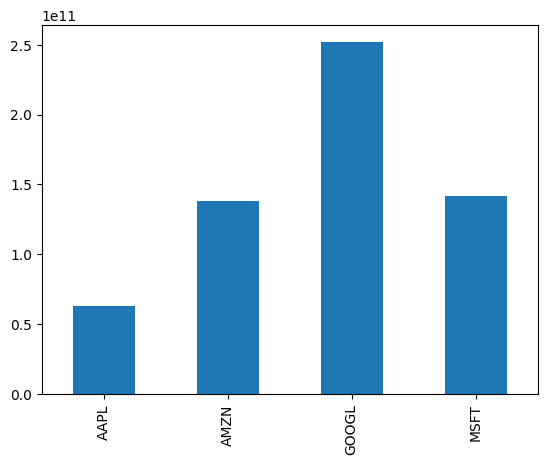

In [7]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Accounts Receivable for each company
display(balance_sheet.loc[:, "Accounts Receivable", :])

# Plot the value of Total Shareholder Equity for each company in 2021
balance_sheet.loc[:, "Total Shareholder Equity", :]['2021'].plot(kind="bar")

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [8]:
companies.get_profile()

,AAPL,MSFT,GOOGL,AMZN
symbol,AAPL,MSFT,GOOGL,AMZN
price,191.94,343.77,120.02,130
beta,1.292349,0.91086,1.052595,1.257855
volAvg,57671127,29314349,34727995,63509581
mktCap,3018966757847,2556098325796,1525850177425,1333852016640
lastDiv,0.96,2.72,0,0.2
range,124.17-198.23,213.43-366.78,83.34-129.04,81.43-146.57
changes,-1.19,-3.1,0.82,0.04
companyName,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
currency,USD,USD,USD,USD


# The Ratios Module

After initialization of `Toolkit`, you can get access to the Ratios module which includes over 50 different ratios. This can be done by calling the `ratios` property.

In [9]:
ratios = companies.ratios

help(ratios)

Help on Ratios in module financetoolkit.base.ratios_controller object:

class Ratios(builtins.object)
 |  Ratios(tickers: str | list[str], historical: pandas.core.frame.DataFrame, balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame)
 |  
 |  Ratios Controller Class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tickers: str | list[str], historical: pandas.core.frame.DataFrame, balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  collect_all_ratios(self, include_dividends: bool = False, diluted: bool = True, days: int = 365)
 |      Calculates all Ratios based on the data provided.
 |  
 |  collect_efficiency_ratios(self, days: int = 365)
 |      Calculates all Efficiency Ratios based on the data provided.
 |  
 |  collect_liquidity_ratios(self) -> pandas.core.frame.DataFrame
 |      Calc

Within this ratios module, the distinction is made between `collect_` and `get_`. The former obtains a collection of ratios (e.g. all solvency ratios) whereas the latter obtains a specific ratio.

In [10]:
ratios.collect_valuation_ratios()

2001          2002          2003  \
AAPL Earnings per Share (EPS)       -1.911717e-03  3.208299e-03  3.389981e-03   
     Revenue per Share (RPS)         2.770956e-01  2.834162e-01  3.049509e-01   
     Price-to-Earnings (PE)         -1.738688e+02  6.779107e+01  9.567723e+01   
     Earnings per Share Growth                NaN -2.678229e+00  5.662893e-02   
     Price-to-Earnings-Growth (PEG)  9.094903e+04  2.112991e+04  2.822353e+04   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                      2.026611e+01  1.526173e+01  1.226528e+01   
     EV-to-EBITDA                    1.704640e+01  1.352226e+01  1.232386e+01   
     EV-to-Operating-Cash-Flow       1.683557e+01  1.211030e+01  1.143372e+01   
     Tangible Asset Value            4.728900e+10  5.218000e+10  6.102000e+10   
     Net Current Asset Value         2.850500e+10  3.583200e+10  4.499900e+10   

                                             2004          2005          2006  \
AAPL Earnings per Share (EPS)        1.272257e-02  5.564219e-02  8.094998e-02   
     Revenue per Share (RPS)         3.816310e-01  5.806378e-01  7.860980e-01   
     Price-to-Earnings (PE)          7.682677e+01  3.921894e+01  3.181379e+01   
     Earnings per Share Growth       2.752992e+00  3.373502e+00  4.548309e-01   
     Price-to-Earnings-Growth (PEG)  6.038619e+03  7.048418e+02  3.930056e+02   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                      1.544559e+01  1.189626e+01  1.204556e+01   
     EV-to-EBITDA                    1.843194e+01  1.283154e+01  1.266049e+01   
     EV-to-Operating-Cash-Flow       1.287942e+01  1.191274e+01  1.527187e+01   
     Tangible Asset Value            7.482500e+10  4.811500e+10  3.623800e+10   
     Net Current Asset Value         5.559700e+10  3.186000e+10  2.656800e+10   

                                             2007          2008          2009  \
AAPL Earnings per Share (EPS)        1.404006e-01  1.913706e-01  2.246011e-01   
     Revenue per Share (RPS)         9.640896e-01  1.285793e+00  1.438683e+00   
     Price-to-Earnings (PE)          4.282557e+01  1.353817e+01  2.848041e+01   
     Earnings per Share Growth       7.344119e-01  3.630323e-01  1.736447e-01   
     Price-to-Earnings-Growth (PEG)  3.050241e+02  7.074321e+01  1.268044e+02   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                      1.248942e+01  5.318771e+00  1.051949e+01   
     EV-to-EBITDA                    1.257513e+01  5.159737e+00  9.095172e+00   
     EV-to-Operating-Cash-Flow       1.410709e+01  5.860689e+00  1.095271e+01   
     Tangible Asset Value            2.633700e+10  2.417800e+10  2.705500e+10   
     Net Current Asset Value         1.641400e+10  1.335600e+10  2.224600e+10   

                                             2010  ...          2013  \
AAPL Earnings per Share (EPS)        5.412110e-01  ...  1.419775e+00   
     Revenue per Share (RPS)         2.519124e+00  ...  6.551656e+00   
     Price-to-Earnings (PE)          1.809154e+01  ...  1.240525e+01   
     Earnings per Share Growth       1.409655e+00  ... -9.948129e-02   
     Price-to-Earnings-Growth (PEG)  3.342789e+01  ...  8.737477e+00   
...                                           ...  ...           ...   
MSFT EV-to-EBIT                      7.715293e+00  ...  1.017866e+01   
     EV-to-EBITDA                    7.252162e+00  ...  9.165434e+00   
     EV-to-Operating-Cash-Flow       8.064954e+00  ...  9.701380e+00   
     Tangible Asset Value            3.378100e+10  ...  6.428900e+10   
     Net Current Asset Value         2.952900e+10  ...  6.404900e+10   

                                             2014          2015          2016  \
AAPL Earnings per Share (EPS)        1.613269e+00  2.304219e+00  2.076576e+00   
     Revenue per Share (RPS)         7.463868e+00  1.008598e+01  9.801272e+00   
     Price-to-Earn

In [11]:
ratios.get_effective_tax_rate()

date,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
AAPL,0.288462,0.252874,0.260870,0.279373,0.264463,0.294180,0.301917,0.298912,0.285571,0.244175,...,0.261549,0.261261,0.263683,0.255573,0.245565,0.183422,0.159438,0.144282,0.133023,0.162045
AMZN,-0.000000,-0.000000,0.000000,-0.653556,0.221963,0.496021,0.278788,0.274140,0.217916,0.235137,...,0.318182,-1.504505,0.605867,0.366136,0.202049,0.106296,0.169863,0.118413,0.125580,0.541947
GOOGL,0.306218,0.461071,0.695235,0.386192,0.315771,0.232756,0.259123,0.277904,0.222014,0.212208,...,0.157423,0.193001,0.168083,0.193458,0.534365,0.119640,0.133300,0.162493,0.162023,0.159208
MSFT,0.330065,0.319986,0.321404,0.330272,0.263050,0.310097,0.300284,0.257538,0.264971,0.249990,...,0.191816,0.206542,0.341168,0.149511,0.084021,0.545676,0.101813,0.165077,0.138266,0.131134


Some of these ratios also include optional fields depending on whether there is room for different methods of calculation. E.g. whether you'd like to have the diluted average shares included in the calculation.

In [12]:
ratios.collect_solvency_ratios(diluted=False)

date                                      2001       2002       2003  \
AAPL  Debt-to-Assets Ratio            0.052649   0.050175   0.044607   
      Debt-to-Equity Ratio            0.080867   0.077167   0.071987   
      Interest Coverage Ratio       -15.125000  26.000000  25.250000   
      Debt Service Coverage Ratio    -0.226614   0.101327   0.037760   
      Equity Multiplier                    NaN   1.536993   1.576461   
      Free Cash Flow Yield           -0.007306  -0.019658   0.019083   
      Net-Debt to EBITDA Ratio        8.235537  -6.769231 -15.306931   
      Cash Flow Coverage Ratio       -0.007306  -0.019658   0.019083   
      CAPEX Coverage Ratio           -0.797414  -0.511494  -1.762195   
      Dividend CAPEX Coverage Ratio  -0.797414  -0.511494  -1.762195   
AMZN  Debt-to-Assets Ratio            1.325840   1.150807   0.901769   
      Debt-to-Equity Ratio           -1.507726  -1.693228  -1.881712   
      Interest Coverage Ratio        -2.027716   1.062627   2.684318   
      Debt Service Coverage Ratio    -0.447418   0.060156   0.216009   
      Equity Multiplier                    NaN  -1.299047  -1.738225   
      Free Cash Flow Yield           -0.043165   0.018906   0.016629   
      Net-Debt to EBITDA Ratio       -5.776515  10.221292   2.428690   
      Cash Flow Coverage Ratio       -0.043165   0.018906   0.016629   
      CAPEX Coverage Ratio            2.380358  -4.450400  -8.529078   
      Dividend CAPEX Coverage Ratio   2.380358  -4.450400  -8.529078   
GOOGL Debt-to-Assets Ratio                 NaN   0.037861   0.007584   
      Debt-to-Equity Ratio                 NaN   0.062442   0.011225   
      Interest Coverage Ratio              inf        inf        inf   
      Debt Service Coverage Ratio          NaN   2.083233   1.454496   
      Equity Multiplier                    NaN        NaN   1.518703   
      Free Cash Flow Yield                 NaN        NaN        NaN   
      Net-Debt to EBITDA Ratio             NaN  -0.217639  -0.358192   
      Cash Flow Coverage Ratio             NaN        NaN        NaN   
      CAPEX Coverage Ratio           -2.384615  -4.174015  -2.236667   
      Dividend CAPEX Coverage Ratio  -2.384615  -4.174015  -2.236667   
MSFT  Debt-to-Assets Ratio            0.000000   0.000000   0.000000   
      Debt-to-Equity Ratio            0.000000   0.000000   0.000000   
      Interest Coverage Ratio              inf        inf        inf   
      Debt Service Coverage Ratio     1.052821   0.934557   0.945828   
      Equity Multiplier                    NaN   1.275805   1.300504   
      Free Cash Flow Yield            0.055924   0.078963   0.080869   
      Net-Debt to EBITDA Ratio       -0.295866  -0.232107  -0.439274   
      Cash Flow Coverage Ratio        0.055924   0.078963   0.080869   
      CAPEX Coverage Ratio          -12.168631 -18.842857 -17.729517   
      Dividend CAPEX Coverage Ratio -12.168631 -18.842857  -9.037185   

date                                       2004        2005       2006  \
AAPL  Debt-to-Assets Ratio             0.000000    0.000000   0.000000   
      Debt-to-Equity Ratio             0.000000    0.000000   0.000000   
      Interest Coverage Ratio        158.666667  -11.084848  -7.336986   
      Debt Service Coverage Ratio      0.121642    0.473594   0.379076   
      Equity Multiplier                1.598559    1.562829   1.647908   
      Free Cash Flow Yield             0.037267    0.046055   0.025680   
      Net-Debt to EBITDA Ratio        -6.237395   -1.908693  -2.386856   
      Cash Flow Coverage Ratio         0.037267    0.046055   0.025680   
      CAPEX Coverage Ratio            -5.306818   -9.750000  -3.378995   
      Dividend CAPEX Coverage Ratio   -5.306818   -9.750000  -3.378995   
AMZN  Debt-to-Assets Ratio             0.571863    0.411526   0.290397   
      Debt-to-Equity Ratio            -8.176101    6.182927   2.939675   
      Interest Coverage Ratio          4.813610    6.010870   7.615385   
      Debt 

There is also an option to show all ratios if desired. Since each `collect` function depends on the `get` functions, these will always have the same result.

In [13]:
ratios.collect_all_ratios()

2001          2002  \
AAPL Days of Inventory Outstanding (DIO)                  NaN  2.469195e+00   
     Days of Sales Outstanding (DSO)                      NaN  3.276863e+01   
     Operating Cycle (CC)                                 NaN  3.523783e+01   
     Days of Accounts Payable Outstanding (DPO)           NaN  7.548683e+01   
     Cash Conversion Cycle (CCC)                          NaN -4.024900e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  2.026611e+01  1.526173e+01   
     EV-to-EBITDA                                1.704640e+01  1.352226e+01   
     EV-to-Operating-Cash-Flow                   1.683557e+01  1.211030e+01   
     Tangible Asset Value                        4.728900e+10  5.218000e+10   
     Net Current Asset Value                     2.850500e+10  3.583200e+10   

                                                         2003          2004  \
AAPL Days of Inventory Outstanding (DIO)         4.097022e+00  4.759551e+00   
     Days of Sales Outstanding (DSO)             4.454447e+01  4.408745e+01   
     Operating Cycle (CC)                        4.864149e+01  4.884700e+01   
     Days of Accounts Payable Outstanding (DPO)  8.376584e+01  7.897218e+01   
     Cash Conversion Cycle (CCC)                -3.512435e+01 -3.012517e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  1.226528e+01  1.544559e+01   
     EV-to-EBITDA                                1.232386e+01  1.843194e+01   
     EV-to-Operating-Cash-Flow                   1.143372e+01  1.287942e+01   
     Tangible Asset Value                        6.102000e+10  7.482500e+10   
     Net Current Asset Value                     4.499900e+10  5.559700e+10   

                                                         2005          2006  \
AAPL Days of Inventory Outstanding (DIO)         4.909486e+00  5.787526e+00   
     Days of Sales Outstanding (DSO)             3.094286e+01  3.927789e+01   
     Operating Cycle (CC)                        3.585235e+01  4.506542e+01   
     Days of Accounts Payable Outstanding (DPO)  5.961519e+01  6.877178e+01   
     Cash Conversion Cycle (CCC)                -2.376284e+01 -2.370636e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  1.189626e+01  1.204556e+01   
     EV-to-EBITDA                                1.283154e+01  1.266049e+01   
     EV-to-Operating-Cash-Flow                   1.191274e+01  1.527187e+01   
     Tangible Asset Value                        4.811500e+10  3.623800e+10   
     Net Current Asset Value                     3.186000e+10  2.656800e+10   

                                                         2007          2008  \
AAPL Days of Inventory Outstanding (DIO)         7.091850e+00  7.314029e+00   
     Days of Sales Outstanding (DSO)             5.225798e+01  3.624827e+01   
     Operating Cycle (CC)                        5.934983e+01  4.356230e+01   
     Days of Accounts Payable Outstanding (DPO)  9.624653e+01  8.973587e+01   
     Cash Conversion Cycle (CCC)                -3.689670e+01 -4.617357e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                  1.248942e+01  5.318771e+00   
     EV-to-EBITDA                                1.257513e+01  5.159737e+00   
     EV-to-Operating-Cash-Flow                   1.410709e+01  5.860689e+00   
     Tangible Asset Value                        2.633700e+10  2.417800e+10   
     Net Current Asset Value                     1.641400e+10  1.335600e+10   

                                                         2009          2010  \
AAPL Days of Inventory Outstanding (DIO)         7.519340e+00  6.950886e+00   
     Days of Sales Outstanding (DSO)             2.888572e+01  3.717152e+01   
     Operating Cycle (CC

# The Models Module

After initialization of `Toolkit`, you can get access to the Models module which includes a variety of well-known models. This can be done by calling the `models` property.

In [14]:
models = companies.models

It is possible to perform an (extended) Dupont analysis for each company.

In [15]:
models.get_dupont_analysis()

date                         2001      2002      2003      2004        2005  \
AAPL  Net Profit Margin -0.006899  0.011320  0.011116  0.033337    0.095829   
      Asset Turnover          NaN  0.932219  0.946694  1.113892    1.421458   
      Equity Multiplier       NaN  1.536993  1.576461  1.598559    1.562829   
      Return on Equity        NaN  0.016220  0.016591  0.059361    0.212885   
AMZN  Net Profit Margin -0.178308 -0.038122  0.006703  0.085022    0.039223   
      Asset Turnover          NaN  2.168104  2.535206  2.558385    2.445098   
      Equity Multiplier       NaN -1.299047 -1.738225 -4.282802  369.604982   
      Return on Equity        NaN  0.107371 -0.029538 -0.931596   35.446272   
GOOGL Net Profit Margin  0.080821  0.226744  0.072069  0.125146    0.238720   
      Asset Turnover          NaN       NaN  2.531073  1.524190    0.903715   
      Equity Multiplier       NaN       NaN  1.518703  1.189601    1.100190   
      Return on Equity        NaN       NaN  0.277028  0.226912    0.237349   
MSFT  Net Profit Margin  0.290402  0.276009  0.310467  0.221746    0.307982   
      Asset Turnover          NaN  0.447034  0.437273  0.428414    0.487586   
      Equity Multiplier       NaN  1.275805  1.300504  1.265854    1.327509   
      Return on Equity        NaN  0.157416  0.176555  0.120255    0.199349   

date                          2006      2007      2008      2009      2010  \
AAPL  Net Profit Margin   0.102977  0.145630  0.148835  0.156116  0.214841   
      Asset Turnover      1.343372  1.128314  1.000601  0.782184  1.010974   
      Equity Multiplier   1.647908  1.735683  1.825516  1.911977  1.706280   
      Return on Equity    0.227966  0.285202  0.271863  0.233474  0.370602   
AMZN  Net Profit Margin   0.017739  0.032086  0.033653  0.036803  0.033680   
      Asset Turnover      2.658146  2.735066  2.590175  2.215303  2.097761   
      Equity Multiplier  11.903988  6.663391  3.825019  2.790642  2.690372   
      Return on Equity    0.561300  0.584767  0.333419  0.227519  0.190083   
GOOGL Net Profit Margin   0.290190  0.253328  0.193932  0.275699  0.290065   
      Asset Turnover      0.737857  0.757558  0.763372  0.654557  0.596272   
      Equity Multiplier   1.086412  1.102685  1.121245  1.124858  1.195787   
      Return on Equity    0.232622  0.211617  0.165992  0.202993  0.206821   
MSFT  Net Profit Margin   0.284517  0.275126  0.292635  0.249311  0.300237   
      Asset Turnover      0.630744  0.770095  0.888765  0.775639  0.761995   
      Equity Multiplier   1.591630  1.864693  2.017779  1.986723  1.912927   
      Return on Equity    0.285630  0.395079  0.524791  0.384183  0.437638   

date                     ...      2013      2014      2015      2016  \
AAPL  Net Profit Margin  ...  0.216705  0.216144  0.228458  0.211868   
      Asset Turnover     ...  0.892331  0.833085  0.894915  0.704513   
      Equity Multiplier  ...  1.584487  1.866637  2.262077  2.472355   
      Return on Equity   ...  0.306396  0.336118  0.462482  0.369033   
AMZN  Net Profit Margin  ...  0.003680 -0.002708  0.005570  0.017435   
      Asset Turnover     ...  2.047804  1.880081  1.784192  1.827217   
      Equity Multiplier  ...  4.053629  4.620686  4.971979  4.556185   
      Return on Equity   ...  0.030550 -0.023527  0.049409  0.145153   
GOOGL Net Profit Margin  ...  0.215963  0.218845  0.218005  0.215770   
      Asset Turnover     ...  0.584463  0.545343  0.538339  0.573232   
      Equity Multiplier  ...  1.287340  1.261948  1.239126  1.214333   
      Return on Equity   ...  0.162491  0.150608  0.145425  0.150196   
MSFT  Net Profit Margin  ...  0.280839  0.254212  0.130295  0.196882   
      Asset Turnover     ...  0.590432  0.551645  0.536880  0.461293   
      Equity Multiplier  ...  1.814792  1.865814  2.052235  2.432384   
      Return on Equity   ...  0.300921  0.261652  0.143559  0.220910   

date                         2017      2018      2019      2020      2021  \
AAPL  Net Profit Margin  0.

In [16]:
models.get_extended_dupont_analysis()

date                               2001      2002      2003      2004  \
AAPL  Interest Burden Ratio    6.615385  1.931034  0.967391  0.851175   
      Tax Burden Ratio         0.107558  0.386905  0.775281  0.846626   
      Operating Profit Margin -0.009696  0.015152  0.014822  0.046262   
      Asset Turnover                NaN  0.932219  0.946694  1.113892   
      Equity Multiplier             NaN  1.536993  1.576461  1.598559   
      Return on Equity              NaN  0.016220  0.016591  0.059361   
AMZN  Interest Burden Ratio    0.783123 -0.439917  7.575872  1.237601   
      Tax Burden Ratio         1.350502 -2.338173  0.130387  1.336098   
      Operating Profit Margin -0.168595 -0.037062  0.006786  0.051418   
      Asset Turnover                NaN  2.168104  2.535206  2.558385   
      Equity Multiplier             NaN -1.299047 -1.738225 -4.282802   
      Return on Equity              NaN  0.107371 -0.029538 -0.931596   
GOOGL Interest Burden Ratio    1.088995  1.008388  0.987913  0.984556   
      Tax Burden Ratio         0.637085  0.534446  0.308494  0.623436   
      Operating Profit Margin  0.116493  0.420732  0.236473  0.203885   
      Asset Turnover                NaN       NaN  2.531073  1.524190   
      Equity Multiplier             NaN       NaN  1.518703  1.189601   
      Return on Equity              NaN       NaN  0.277028  0.226912   
MSFT  Interest Burden Ratio    1.016920  1.034483  0.897528  0.740735   
      Tax Burden Ratio         0.626792  0.657347  0.756072  0.904140   
      Operating Profit Margin  0.455606  0.405888  0.457514  0.331098   
      Asset Turnover                NaN  0.447034  0.437273  0.428414   
      Equity Multiplier             NaN  1.275805  1.300504  1.265854   
      Return on Equity              NaN  0.157416  0.176555  0.120255   

date                                 2005       2006      2007      2008  \
AAPL  Interest Burden Ratio      0.909091   0.870476  0.880391  0.910080   
      Tax Burden Ratio           0.809091   0.810844  0.792924  0.770359   
      Operating Profit Margin    0.130285   0.145897  0.208615  0.212291   
      Asset Turnover             1.421458   1.343372  1.128314  1.000601   
      Equity Multiplier          1.562829   1.647908  1.735683  1.825516   
      Return on Equity           0.212885   0.227966  0.285202  0.271863   
AMZN  Interest Burden Ratio      1.009346   1.031830  0.992424  0.934517   
      Tax Burden Ratio           0.770833   0.488432  0.726718  0.766033   
      Operating Profit Margin    0.050412   0.035197  0.044489  0.047010   
      Asset Turnover             2.445098   2.658146  2.735066  2.590175   
      Equity Multiplier        369.604982  11.903988  6.663391  3.825019   
      Return on Equity          35.446272   0.561300  0.584767  0.333419   
GOOGL Interest Burden Ratio      0.941915   0.885056  0.896091  1.132973   
      Tax Burden Ratio           0.726423   0.866887  0.826788  0.637346   
      Operating Profit Margin    0.348889   0.378225  0.341930  0.268568   
      Asset Turnover             0.903715   0.737857  0.757558  0.763372   
      Equity Multiplier          1.100190   1.086412  1.102685  1.121245   
      Return on Equity           0.237349   0.232622  0.211617  0.165992   
MSFT  Interest Burden Ratio      0.875692   0.901982  0.921546  0.944486   
      Tax Burden Ratio           0.841563   0.764874  0.759285  0.786102   
      Operating Profit Margin    0.417915   0.412402  0.393197  0.394141   
      Asset Turnover             0.487586   0.630744  0.770095  0.888765   
      Equity Multiplier          1.327509   1.591630  1.864693  2.017779   
      Return on Equity           0.199349   0.285630  0.395079  0.524791   

date                               2009      2010  ...      2013      2014  \
AAPL  Interest Burden Ratio    0.959168  0.991640  ...  0.976951  0.981676   
      Tax Burden Ratio         0.744842  0.762197  ...  0.755873  0.752528   
      Operating Profit Margin  0.218518

# Calling Functions Directly

While the `Toolkit` package itself is class-based, this doesn't mean that you are unable to call each functionality individually as well. This accepts virtually any input, from `np.array` to `pd.Series` and regular `floats`.

In [17]:
from financetoolkit.historical import price

price.get_sharpe_ratio(
    returns=np.array([0.09, 0.6, 0.075]), risk_free_rate=np.array([0.01, 0.03, 0.03])
)

price.get_sharpe_ratio(
    returns=pd.Series([0.10, 0.5, 0.075]), risk_free_rate=pd.Series([0.005, 0.02, 0.03])
)

price.get_sharpe_ratio(returns=pd.Series([0.08, 0.3, 0.025]), risk_free_rate=0.01)

0    0.481046
1    1.992904
2    0.103081
dtype: float64

It is also relatively straight forward to group a selection of ratios into one DataFrame.

In [18]:
from financetoolkit.ratios import (
    efficiency,
    liquidity,
    profitability,
    solvency,
    valuation,
)

# Note: this is dummy data, not actual data

asset_turnover = efficiency.get_asset_turnover_ratio(
    sales=pd.Series([100, 110, 120, 130, 80]),
    total_assets_begin=pd.Series([500, 400, 300, 200, 100]),
    total_assets_end=pd.Series([500, 430, 320, 200, 100]),
)

quick_ratio = liquidity.get_quick_ratio(
    cash_and_equivalents=pd.Series([100, 110, 120, 130, 80]),
    accounts_receivable=pd.Series([30, 20, 30, 20, 40]),
    marketable_securities=pd.Series([30, 10, 30, 20, 40]),
    current_liabilities=pd.Series([130, 120, 110, 150, 100]),
)

return_on_assets = profitability.get_return_on_assets(
    net_income=pd.Series([80, 40, 40, 30, 20]),
    total_assets=pd.Series([200, 300, 400, 500, 450]),
)

debt_to_assets = solvency.get_debt_to_assets_ratio(
    total_debt=pd.Series([100, 110, 120, 130, 80]),
    total_assets=pd.Series([200, 140, 160, 160, 300]),
)

price_to_earnings = valuation.get_price_earnings_ratio(
    stock_price=pd.Series([30, 11, 12, 10, 30]),
    earnings_per_share=pd.Series([0.5, 0.4, 0.1, 1.1, 1.2]),
)

components = {
    "Asset Turnover": asset_turnover,
    "Quick Ratio": quick_ratio,
    "Return on Assets": return_on_assets,
    "Debt to Assets": debt_to_assets,
    "Price to Earnings": price_to_earnings,
}


pd.DataFrame(components)

,Asset Turnover,Quick Ratio,Return on Assets,Debt to Assets,Price to Earnings
0,0.200000,1.230769,0.400000,0.500000,60.000000
1,0.265060,1.166667,0.133333,0.785714,27.500000
2,0.387097,1.636364,0.100000,0.750000,120.000000
3,0.650000,1.133333,0.060000,0.812500,9.090909
4,0.800000,1.600000,0.044444,0.266667,25.000000


This returns the following table which closely resembles the proper Dupont analysis for Apple at their given reporting dates in October.

In [19]:
from financetoolkit.models import dupont

years = [2018, 2019, 2020, 2021, 2022]

dupont.get_dupont_analysis(
    net_income=pd.Series(
        [59531000000, 55256000000, 57411000000, 94680000000, 99803000000], index=years
    ),
    total_revenue=pd.Series(
        [265595000000, 260174000000, 274515000000, 365817000000, 394328000000],
        index=years,
    ),
    total_assets_begin=pd.Series(
        [np.nan, 365725000000, 338516000000, 323888000000, 351002000000],
        index=years,
    ),
    total_assets_end=pd.Series(
        [365725000000, 338516000000, 323888000000, 351002000000, 352755000000],
        index=years,
    ),
    total_equity_begin=pd.Series(
        [np.nan, 107147000000, 90488000000, 65339000000, 63090000000], index=years
    ),
    total_equity_end=pd.Series(
        [107147000000, 90488000000, 65339000000, 63090000000, 50672000000], index=years
    ),
)

,2018,2019,2020,2021,2022
Net Profit Margin,0.224142,0.212381,0.209136,0.258818,0.253096
Asset Turnover,NaN,0.738878,0.828845,1.084079,1.120637
Equity Multiplier,NaN,3.563342,4.250894,5.254966,6.186222
Return on Equity,NaN,0.559172,0.736856,1.474433,1.754593
